# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [7]:
print(iris.keys())
print(iris['filename'])
print(iris.data[0:10]) #前十筆 特徵欄位
print(type(iris.data)) #資料型別
print(iris.target_names) #樣本類別資料名稱
print(iris.target) #實際上類別資料已經轉成數字

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
C:\Users\lin\anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
# we only take the first two features. 
X=iris.data[:,:2]
print(X.shape)
Y=iris.target
print(Y.shape)

(150, 2)
(150,)


In [9]:
X #陣列

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [10]:
Y #陣列

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
#以下是組成 pandas DataFrame (也可以不用這種做) Concat
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [13]:
print('target_names:'+str(iris['target_names']))

target_names:['setosa' 'versicolor' 'virginica']


In [18]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [28]:
#合併資料特徵欄位與目標欄位
iris_data=pd.concat([x,y],axis=1)
iris_data[['sepal length (cm)','petal length (cm)','target']].head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [78]:
#只選擇iris_data內的target，目標為0與1的資料=>isin

iris_data=iris_data[iris_data['target'].isin([0,1])]
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [33]:
#看資料量
print(iris['data'].size) #資料共150筆，每筆有4個資料，資料共有600個
print(iris['data'].size/len(iris['target']))
print(iris['data'].size/len(iris['feature_names']))

600
4.0
150.0


## 切分訓練集與測試集
> train_test_split()

In [85]:
from sklearn.model_selection import train_test_split
#train_test_split=(X,Y,test_size)
X_train, X_test, Y_train, Y_test=train_test_split(iris_data[['sepal length (cm)','petal length (cm)']],iris_data[['target']],test_size=0.3)

In [86]:
X_train.head()

,sepal length (cm),petal length (cm)
49,5.0,1.4
42,4.4,1.3
13,4.3,1.1
55,5.7,4.5
43,5.0,1.6


In [87]:
X_test.head()

,sepal length (cm),petal length (cm)
75,6.6,4.4
64,5.6,3.6
68,6.2,4.5
94,5.6,4.2
40,5.0,1.3


In [88]:
Y_train.head()

,target
49,0
42,0
13,0
55,1
43,0


In [89]:
Y_test.head()

,target
75,1
64,1
68,1
94,1
40,0


In [84]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape) #1D
print(Y_test.shape) #1D

(70, 2)
(30, 2)
(70,)
(30,)


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [90]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [92]:
stats = norm_stats(X_train) #normalization
arr_x_train = np.array(z_score(X_train, stats)) #將歸一化數值轉換，使標準差=1
arr_y_train = np.array(Y_train) #Y資料集通常不需要轉換，只需要轉至array內使用
arr_x_train[:5]

array([[-0.6821763 , -0.97246471],
       [-1.59755663, -1.04221115],
       [-1.75012002, -1.18170404],
       [ 0.38576743,  1.18967506],
       [-0.6821763 , -0.83297182]])

In [96]:
stats = norm_stats(X_test) #normalization
arr_x_test = np.array(z_score(X_test, stats)) #將歸一化數值轉換，使標準差=1
arr_y_test = np.array(Y_test) #Y資料集通常不需要轉換，只需要轉至array內使用
arr_x_test[:5]

array([[ 1.80921719,  0.95397258],
       [ 0.12361111,  0.40227759],
       [ 1.13497476,  1.02293445],
       [ 0.12361111,  0.81604883],
       [-0.88775253, -1.18384548]])

## use sklearn

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.44714286 2.79428571]
[0.65546525 1.43376485]


In [94]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.6821763 , -0.97246471],
       [-1.59755663, -1.04221115],
       [-1.75012002, -1.18170404],
       [ 0.38576743,  1.18967506],
       [-0.6821763 , -0.83297182]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [95]:
#若X_test也要做轉換，請記得也要做一次fit再轉transform的動作，否則單純只使用transform數值會是錯的
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[ 1.75883793  1.11992862]
 [ 0.23320404  0.56195707]
 [ 1.14858437  1.18967506]
 [ 0.23320404  0.98043573]
 [-0.6821763  -1.04221115]
 [ 1.30114776  1.46866084]
 [ 0.08064065  1.11992862]
 [-0.07192274 -0.90271827]
 [-0.83473969 -0.97246471]
 [ 1.91140132  1.53840729]]


In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_test)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.52666667 3.01666667]
[0.59325842 1.45007663]


In [98]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[ 1.80921719  0.95397258]
 [ 0.12361111  0.40227759]
 [ 1.13497476  1.02293445]
 [ 0.12361111  0.81604883]
 [-0.88775253 -1.18384548]
 [ 1.30353536  1.29878194]
 [-0.0449495   0.95397258]
 [-0.2135101  -1.04592174]
 [-1.05631314 -1.11488361]
 [ 1.97777779  1.36774381]]


you can also use fit_transform method (i.e., fit and then transform)    

In [99]:
#當然，可以直接使用fit_transform()，避免有二次轉換遺漏的問題
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])

[[ 1.80921719  0.95397258]
 [ 0.12361111  0.40227759]
 [ 1.13497476  1.02293445]
 [ 0.12361111  0.81604883]
 [-0.88775253 -1.18384548]
 [ 1.30353536  1.29878194]
 [-0.0449495   0.95397258]
 [-0.2135101  -1.04592174]
 [-1.05631314 -1.11488361]
 [ 1.97777779  1.36774381]]


In [100]:
#平均值為0，標準差為1
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0000000000000002


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.736981475682505
30.65275353346185


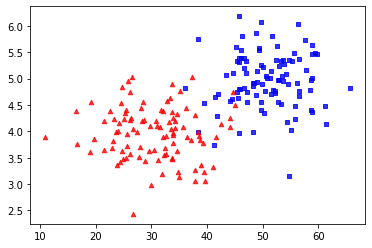

In [117]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)

plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [118]:
#concat資料
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [119]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [120]:
minmax_norm(x_val[:10])

array([0.10624823, 0.5743474 , 0.61561551, 0.07939985, 0.        ,
       0.0137969 , 0.65707922, 1.        , 0.00912436, 0.12653476])

In [123]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape) #為1D，200筆的資料
x_val=x_val.reshape(-1, 1) #要使用MinMaxScaler，要先轉換成2D
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

(200, 1)
(200, 1)
[65.65623553]
[[0.65845778]
 [0.78008139]
 [0.79080385]
 [0.65148191]
 [0.63085189]
 [0.63443666]
 [0.80157714]
 [0.89067634]
 [0.63322262]
 [0.66372872]]


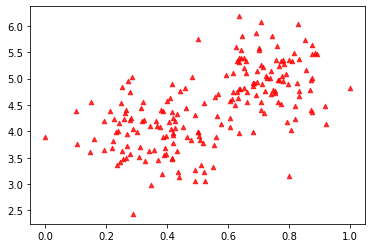

In [124]:
#正規化後的圖形
plt.scatter(scaler.transform(x_val),y_val,c='r', marker='^', s=20, alpha=0.8)